Data source: https://www.kaggle.com/yash612/stockmarket-sentiment-dataset

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/Self-study/projects/stocks-news-analysis'
os.chdir(path)

Mounted at /content/gdrive


In [3]:
#Import libraries/datasets and perform exploratory data analysis
!pip install wordcloud
!pip install gensim
!pip install nltk

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [8]:
#Load the stock new data
stock_df = pd.read_csv("stock_sentiment.csv")  
stock_df                                                       

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [9]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [12]:
#Check if there are any missing data
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [20]:
#Perform data cleaning 
#Remove punctuations from text
import string
def remove_punc(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = "".join(Test_punc_removed)

  return Test_punc_removed_join
stock_df['Text Without Punctuations'] = stock_df['Text'].apply(remove_punc)
stock_df

,Text,Sentiment,Text Without Punctuations
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [21]:
#Remove Stopwords
#downloads stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
#Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [27]:
#Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if len(token) >= 3 and token not in stop_words:
      result.append(token)

  return result

stock_df['Text Without Puncs and Stopwords'] = stock_df['Text Without Punctuations'].apply(preprocess)
stock_df

,Text,Sentiment,Text Without Punctuations,Text Without Puncs and Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [30]:
#join the words into a string
stock_df['Text Without Puncs & Stopwords Joined'] = stock_df['Text Without Puncs and Stopwords'].apply(lambda x: " ".join(x))

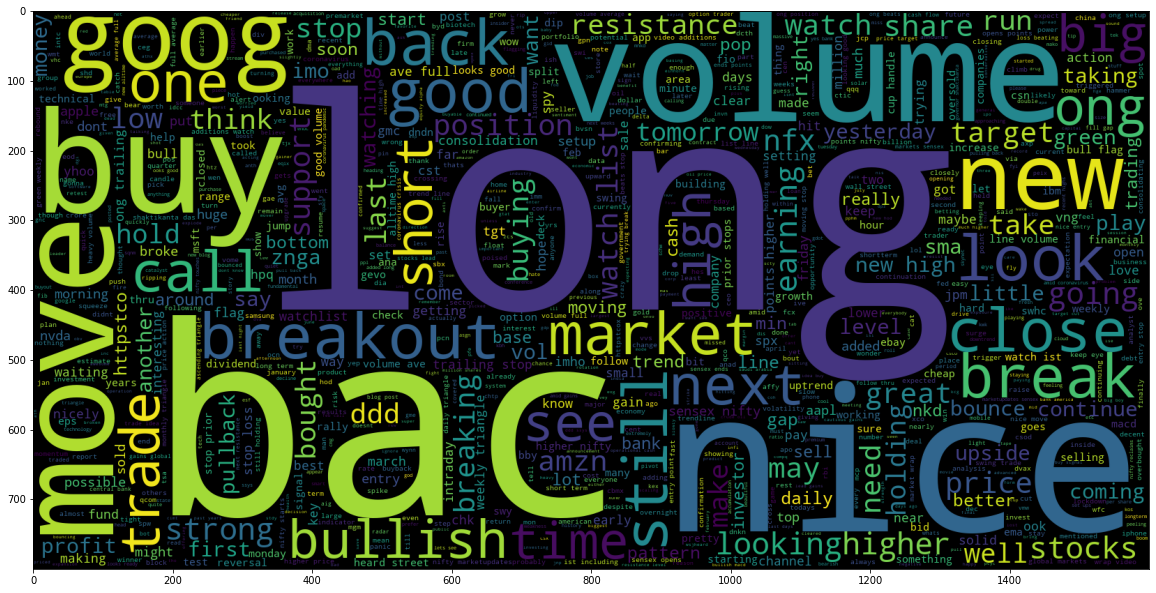

In [33]:
#plot wordcloud
plt.figure(figsize=(20,20))
#WC Positive sentiment
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate(" ".join(stock_df[stock_df['Sentiment']==1]['Text Without Puncs & Stopwords Joined']))
plt.imshow(wc)

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
#word_tokenize is used to break up a string into words
print(stock_df['Text Without Puncs & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Puncs & Stopwords Joined'][0]))

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [38]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Puncs & Stopwords Joined'] ]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

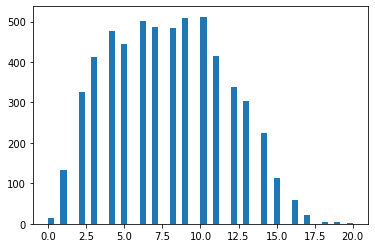

In [39]:
plt.hist(tweets_length, bins = 50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


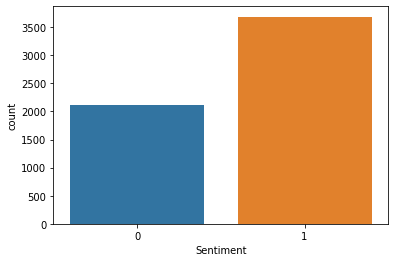

In [40]:
sns.countplot(stock_df['Sentiment'])

In [44]:
stock_df

,Text,Sentiment,Text Without Punctuations,Text Without Puncs and Stopwords,Text Without Puncs & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [49]:
#Obtain the total words present in the dataset 
list_of_words = []
for i in stock_df['Text Without Puncs and Stopwords']:
  for j in i:
    list_of_words.append(j)

In [50]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'chea

In [51]:
#Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

In [52]:
#Split the data into test and train
X = stock_df['Text Without Puncs and Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [54]:
print(X_train.shape)
print(X_test.shape)

(4632,)
(1159,)


In [55]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)
# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)
# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [56]:
train_sequences

[[3347, 1012, 3348, 1409, 492, 287, 15],
 [1, 108, 426, 3349, 185, 2294, 3350, 3351, 18],
 [117, 761, 493, 25, 141, 2295, 537, 538, 3352],
 [3353, 133, 386, 25, 627, 42, 7, 36],
 [1176, 2296, 125, 68, 1410, 3354, 3355, 1411, 1412, 873, 1413, 154],
 [82, 23, 3356, 126, 18],
 [12, 3357, 1177, 762, 3358, 1414, 763],
 [583, 458, 3359, 2297, 40, 3360, 874],
 [296, 66, 1415, 169, 459, 8, 109, 3361, 16, 244],
 [44, 32, 23, 2298, 110],
 [32, 23, 2299],
 [2300, 126, 2301, 875, 34, 3362, 4, 494, 31],
 [2302, 245, 134, 13, 120],
 [33, 37, 288],
 [8, 427, 359, 694, 135, 695],
 [1744, 876, 269, 1178, 696, 1745, 460, 1013, 53, 2303, 2304, 3363],
 [387, 1746, 2305, 2306, 64, 1179, 20, 258, 75, 68, 584, 296],
 [9, 27, 11, 1, 186, 1180],
 [2307, 3364, 3365, 3366, 19, 7, 697, 214, 584, 68, 136],
 [3367, 177, 1014, 14, 1181, 297, 877, 3368, 3369, 3370],
 [246, 1747, 3371, 1178, 26, 3, 2308, 2309, 315, 698, 164, 428, 1416],
 [35, 628, 28, 495],
 [1182,
  1183,
  83,
  1748,
  1184,
  1015,
  20,
  878,
  

In [57]:
test_sequences

[[44, 32, 231, 23, 6886],
 [574, 490, 865, 589],
 [198],
 [585, 200, 620, 627, 37],
 [128, 250, 7477, 662, 128, 555, 1296, 5879],
 [153, 49, 26, 207, 1293],
 [378, 1409, 3464, 356, 417, 158, 661],
 [439, 562, 813, 80, 2266],
 [4252, 213, 4253, 407],
 [506, 491, 569, 170, 591, 611, 491, 2846, 178, 17, 425, 630],
 [131, 1590, 54, 82, 4256, 1555, 32],
 [241, 12, 4492, 1, 589],
 [4],
 [11, 154, 29, 51, 816, 5491],
 [171, 1641, 45, 39],
 [478, 794, 44, 165, 721, 28],
 [1077, 765, 14],
 [1391, 2058, 1326, 724, 250, 224, 5818, 302, 47, 242, 616],
 [2188, 839, 886, 5447, 21],
 [263, 542, 224, 445, 477, 15],
 [387, 1090, 1024, 78, 1576, 105, 348, 214, 19, 36, 147, 18, 387],
 [1077, 66, 5, 698, 19],
 [5, 29, 657, 15, 33],
 [411, 1272, 41, 131, 232, 78, 124, 81],
 [401, 71, 358, 31],
 [259, 152, 1, 51, 10],
 [261, 131, 429, 56, 87, 35, 2372, 493, 297],
 [382, 432, 1090, 1604, 499, 382, 2391, 1604, 4375],
 [21, 212, 60, 60, 6721, 664, 166, 4873, 5698],
 [933, 1946, 1],
 [344, 94, 508, 111, 344],
 

In [58]:
#Add padding to training and testing 
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

In [59]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [3347 1012 3348 1409  492  287   15    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [   1  108  426 3349  185 2294 3350 3351   18    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [ 117  761  493   25  141 2295  537  538 3352    0    0    0    0    0
    0]


In [60]:
#Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [61]:
y_train_cat

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [65]:
#Sequential Model
model = Sequential()
#Embedding layer
model.add(Embedding(total_words, output_dim= 512))
#Bi-directional RNN and LSTM
model.add(LSTM(256))
#Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3)) #Regularization
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 512)         4745216   
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [66]:
#Train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
116/116 [==============================] - 23s 182ms/step - loss: 0.6113 - acc: 0.6826 - val_loss: 0.5203 - val_acc: 0.7530
Epoch 2/2
116/116 [==============================] - 20s 174ms/step - loss: 0.3174 - acc: 0.8729 - val_loss: 0.5654 - val_acc: 0.7487


In [69]:
# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [70]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [71]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7446074201898188

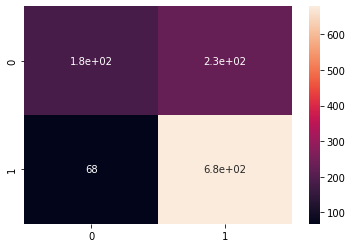

In [72]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)